In [7]:
# 기본 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as sk
import statsmodels.api as sm
import scipy
import pickle

# matplotlib 사용 시 한글 깨짐 문제 해결
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

# 경고 메시지 비활성화
import warnings

warnings.filterwarnings("ignore")

# 경로 확인
path = os.getcwd()
print(path)

C:\Users\lsc\Desktop\ADP\ADP_study


# 머신러닝

## 학생 결석 여부 확인 데이터

- 성별(sex) 바이너리 : 'F' - 여성 또는 'M' - 남성     
- 나이(age) 숫자: 15 - 22     
- 부모님동거여부 (Pstatus) 바이너리: T: 동거 또는 'A': 별거       
- 엄마학력(Medu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육    
- 아빠학력(Fedu) 숫자 : 0 : 없음, 1 : 초등 교육, 2 : 5-9학년, 3 - 중등 교육 또는 4 - 고등 교육   
- 주보호자(guardian) 명목형 : '어머니', '아버지' 또는 '기타'     
- 등하교시간(traveltime) 숫자 : 1 : 15분이하, 2 : 15 ~ 30분, 3 : 30분 ~ 1시간, 4 : 1시간 이상       
- 학습시간(studytime) 숫자 : 1 : 2시간이하, 2 : 2~5시간, 3 : 5~10시간, 4 : 10시간이상    
- 학고횟수(failures)  숫자 : 1, 2, 3 else 4     
- 자유시간(freetime) 숫자 : 1(매우 낮음), 2, 3, 4, 5(매우 높음)   
- 가족관계(famrel) 숫자 : 1(매우 나쁨), 2, 3, 4, 5(우수)  

In [9]:
import ssl
import pandas as pd
import urllib
context = ssl._create_unverified_context()

url1 = 'https://raw.githubusercontent.com/Ssunbell/ADP_study/main/7주차_0625/data/problem1.csv'
encoded_url1 = urllib.parse.quote(url1, safe=':/')

response = urllib.request.urlopen(encoded_url1, context=context)
df1 = pd.read_csv(response, encoding='utf-8')
df1

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10
3,F,15.0,T,2,4,mother,3,1.0,0,3,2.0,2
4,F,NaN,T,3,3,father,2,1.0,0,4,3.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20.0,A,2,2,other,2,1.0,2,5,5.0,11
391,M,17.0,T,1,3,mother,1,2.0,0,2,4.0,3
392,M,21.0,T,1,1,other,1,1.0,3,5,5.0,3
393,M,18.0,T,2,3,mother,1,3.0,0,4,4.0,0


### 1-1 데이터 EDA 및 시각화

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         395 non-null    object 
 1   age         392 non-null    float64
 2   Pstatus     395 non-null    object 
 3   Fedu        395 non-null    int64  
 4   Medu        395 non-null    int64  
 5   guardian    395 non-null    object 
 6   studytime   395 non-null    int64  
 7   traveltime  392 non-null    float64
 8   failures    395 non-null    int64  
 9   famrel      395 non-null    int64  
 10  freetime    390 non-null    float64
 11  absences    395 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.2+ KB


In [27]:
# 빈도 분석 
for col in df1.columns :
    print(col)
    display(df1[col].value_counts(normalize = True))

sex


F    0.526582
M    0.473418
Name: sex, dtype: float64

age


16.0    0.260204
17.0    0.247449
18.0    0.209184
15.0    0.209184
19.0    0.061224
20.0    0.007653
22.0    0.002551
21.0    0.002551
Name: age, dtype: float64

Pstatus


T    0.896203
A    0.103797
Name: Pstatus, dtype: float64

Fedu


2    0.291139
3    0.253165
4    0.243038
1    0.207595
0    0.005063
Name: Fedu, dtype: float64

Medu


4    0.331646
2    0.260759
3    0.250633
1    0.149367
0    0.007595
Name: Medu, dtype: float64

guardian


mother    0.691139
father    0.227848
other     0.081013
Name: guardian, dtype: float64

studytime


2    0.501266
1    0.265823
3    0.164557
4    0.068354
Name: studytime, dtype: float64

traveltime


1.0    0.650510
2.0    0.272959
3.0    0.056122
4.0    0.020408
Name: traveltime, dtype: float64

failures


0    0.789873
1    0.126582
2    0.043038
3    0.040506
Name: failures, dtype: float64

famrel


4    0.493671
5    0.268354
3    0.172152
2    0.045570
1    0.020253
Name: famrel, dtype: float64

freetime


3.0    0.392308
4.0    0.294872
2.0    0.164103
5.0    0.100000
1.0    0.048718
Name: freetime, dtype: float64

absences


0     0.291139
2     0.164557
4     0.134177
6     0.078481
8     0.055696
10    0.043038
14    0.030380
12    0.030380
3     0.020253
16    0.017722
7     0.017722
5     0.012658
18    0.012658
20    0.010127
11    0.007595
9     0.007595
13    0.007595
15    0.007595
22    0.007595
1     0.007595
38    0.002532
30    0.002532
40    0.002532
23    0.002532
19    0.002532
28    0.002532
75    0.002532
21    0.002532
24    0.002532
56    0.002532
26    0.002532
54    0.002532
25    0.002532
17    0.002532
Name: absences, dtype: float64

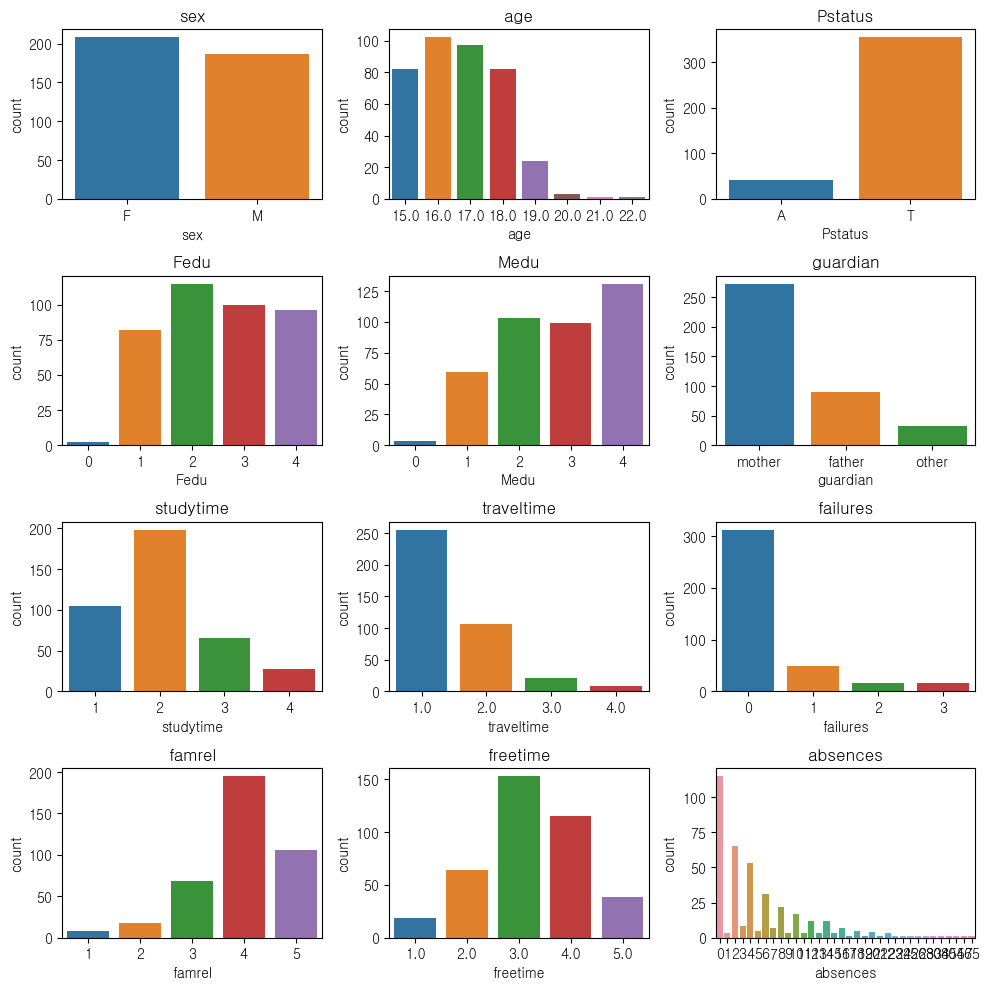

In [21]:
# 빈도 분석
plt.figure(figsize = (10, 10))

for i, col in enumerate(df1.columns) : 
    plt.subplot(len(df1.columns)//3, 3, i+1)
    
    sns.countplot(data = df1, x = df1[col])
    plt.title(col)
    
plt.tight_layout()

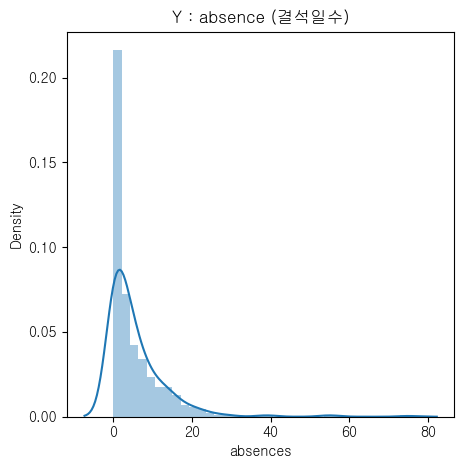

In [25]:
plt.figure(figsize = (5, 5))

sns.distplot(df1['absences'])

plt.title('Y : absence (결석일수)')

plt.show()

In [28]:
# 결석을 많이 하는 학생들은 드물다.
df1['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [40]:
# 모든 변수가 범주형이다. 라벨인코딩 적용 (ordinal 하지 않으니 다행이다!)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df1.select_dtypes(include = 'object') :
    df1[col] = le.fit_transform(df1[col])

In [42]:
len(df1.columns)

13

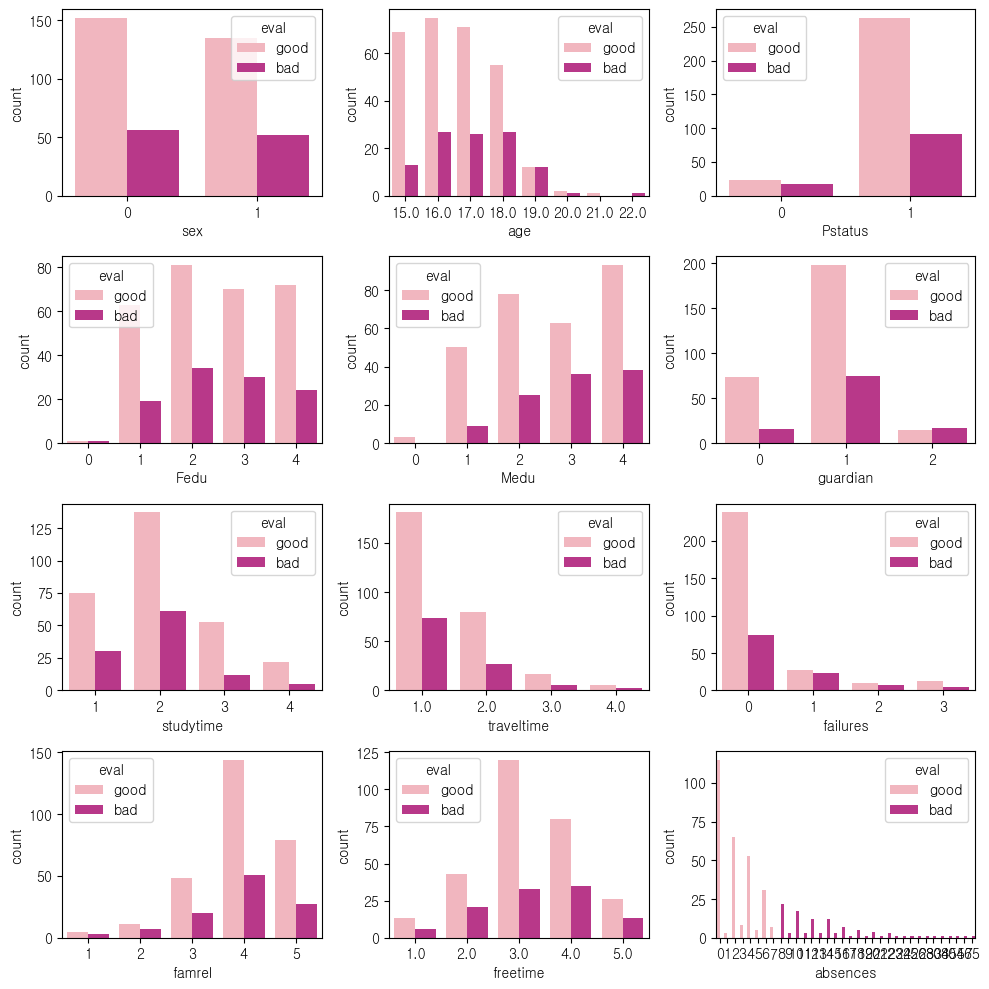

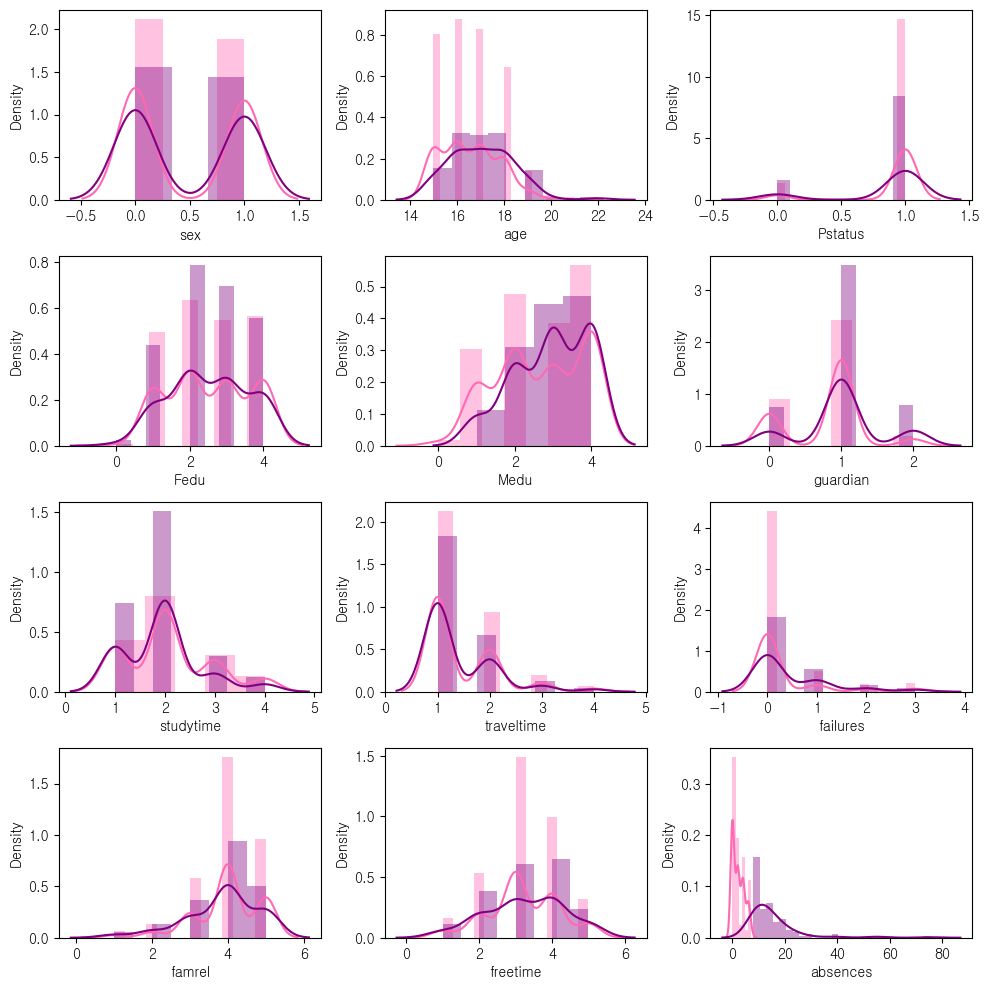

In [50]:
# 결석을 많이 하는 학생들의 속성을 살펴본다.
df1_criterion = df1['absences'].quantile(0.75)
df1['eval'] = df1['absences'].apply(lambda x : 'bad' if x >= df1_criterion else 'good')

plt.figure(figsize = (10, 10))

for i, col in enumerate(df1.columns[ : -1]) : 
    plt.subplot(len(df1.columns)//3, 3, i+1)
    
    sns.countplot(data = df1, x = col, hue = 'eval', palette = 'RdPu')
    
plt.tight_layout()
plt.show()

plt.figure(figsize = (10, 10))

for i, col in enumerate(df1.columns[ : -1]) : 
    plt.subplot(len(df1.columns)//3, 3, i+1)
    
    sns.distplot(df1[df1['eval'] == 'good'][col], color = 'hotpink')
    sns.distplot(df1[df1['eval'] == 'bad'][col], color = 'purple')
    
plt.tight_layout()
plt.show()

In [51]:
# 결측치 확인
df1.isnull().sum()

sex           0
age           3
Pstatus       0
Fedu          0
Medu          0
guardian      0
studytime     0
traveltime    3
failures      0
famrel        0
freetime      5
absences      0
eval          0
dtype: int64

In [52]:
df1[df1.isnull().sum(axis = 1) > 0]

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences,eval
4,0,NaN,1,3,3,0,2,1.0,0,4,3.0,4,good
31,1,15.0,1,4,4,1,2,2.0,0,4,NaN,0,good
33,1,15.0,1,3,3,1,2,1.0,0,5,NaN,0,good
66,1,15.0,0,4,4,1,4,NaN,0,1,3.0,4,good
96,1,NaN,1,3,4,1,1,2.0,0,3,3.0,2,good
97,0,16.0,1,1,2,1,2,1.0,0,4,NaN,2,good
153,1,19.0,1,2,3,1,1,1.0,3,4,NaN,0,good
284,0,17.0,1,2,2,1,2,NaN,0,5,4.0,4,good
316,0,18.0,1,1,2,1,2,2.0,0,5,NaN,0,good
321,0,NaN,1,2,2,1,2,1.0,0,4,2.0,12,bad


In [54]:
len(df1[df1.isnull().sum(axis = 1) > 0]) / len(df1)

0.027848101265822784

### 1-2 결측치 처리 및 변화 시각화, 추가 전처리가 필요하다면 이유와 기대효과를 설명하라

1. 결측치 처리
 - 결측치가 있는 데이터는 전체의 약 3% 가량. 
 - 비율이 매우 작으므로, 결측치 대체 없이 삭제 가능하다.
 
2. 그 외
 - 그룹별 시각화 : 결석일수 상위 25% 기준으로 그룹을 임의로 2개로 나누어, 시각화하였음.
 - 상관분석  
   1) 설명변수끼리 - Phi or Cramer's V  
   2) 설명변수 & 반응변수 : Point Biserial
 - 추가 전처리 : 라벨 인코딩

In [55]:
# 결측치 처리 : 행 삭제
df1.dropna(inplace = True)

In [64]:
df1.reset_index(drop = True, inplace = True)

In [85]:
for col in df1.columns[ : -3] :
    df1[col] = df1[col].astype('int')

In [86]:
# 상관분석
from scipy.stats.contingency import association



0.11333785682797706

In [74]:
from kmodes.kmodes import KModes
import random

random.seed(1234)

kmodes = KModes(n_clusters = 5, init = df1.iloc[random.sample(range(len(df1)), 5), : -1])
kmodes.fit(df1.iloc[ : , : -1])

df1['cluster'] = kmodes.predict(df1.iloc[ : , : -1])
df1['cluster']

0      2
1      1
2      2
3      2
4      0
      ..
379    4
380    0
381    0
382    4
383    1
Name: cluster, Length: 384, dtype: uint16

In [76]:
df1.groupby(['eval', 'cluster']).agg('size')

eval  cluster
bad   0           38
      1           10
      2           32
      3           18
      4            9
good  0          104
      1           60
      2           78
      3           20
      4           15
dtype: int64

### 1-3 결석일수 예측모델을 2개 제시하고 선택한 근거 설명

### 1-4 선정한 모델 2가지 생성 및 모델의 평가 기준을 선정하고 선정 이유 설명

### 1-5 모델이 다양한 일상 상황에서도 잘 동작한다는 것을 설명하고 시각화 하라

### 1-6 모델 최적화 방안에 대해 구체적으로 설명하라

# 통계분석

### 2. 광고횟수와 광고비에 따른 매출액의 데이터이다. 

In [109]:
import pandas as pd

data = {
    '광고횟수' : [2, 3, 4, 4, 5, 6, 7, 9, 11, 12, 13],
    '광고비' : ["낮음", "낮음", "낮음", "높음", "높음", "높음", "낮음", "높음", "높음", "낮음", "높음"],
    '매출액' : [15, 16, 17, 18, 20, 22, 24, 26, 28, 29, 31]
}

adv = pd.DataFrame(data)
adv

,광고횟수,광고비,매출액
0,2,낮음,15
1,3,낮음,16
2,4,낮음,17
3,4,높음,18
4,5,높음,20
5,6,높음,22
6,7,낮음,24
7,9,높음,26
8,11,높음,28
9,12,낮음,29


### 2-1 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정

In [108]:
# 더미변수화
adv = pd.get_dummies(adv)

display(adv)

# 다중회귀 수행
import statsmodels.api as sm

adv_x = adv[['광고횟수', '광고비_높음', '광고비_낮음']]
adv_y = adv['매출액']

adv_x = sm.add_constant(adv_x, has_constant = 'add')

reg = sm.OLS(adv_y, adv_x)
result = reg.fit()

result.summary()

,광고횟수,매출액,광고비_낮음,광고비_높음
0,2,15,1,0
1,3,16,1,0
2,4,17,1,0
3,4,18,0,1
4,5,20,0,1
5,6,22,0,1
6,7,24,1,0
7,9,26,0,1
8,11,28,0,1
9,12,29,1,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sat, 01 Jul 2023   Prob (F-statistic):           9.96e-08
Time:                        21:14:43   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2836      0.374     22.175      0.000       7.422       9.145
광고횟수           1.4350      0.074     19.518      0.000       1.265       1.605
광고비_높음         4.4032      0.364     12.109      0.000       3.565       5.242
광고비_낮음         3.8805      0.285     13.621      0.000       3.223       4.537
==============================================================================
Omnibus:                        7.665   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.407
Skew:                           1.265   Prob(JB):                        0.182
Kurtosis:                       4.015   Cond. No.                     1.10e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.65e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

상수항을 포함한 각 설명변수 유의성 검정 (T검정)

(각 계수별로 귀무/대립가설 설정)  
H_0 : 계수는 통계적으로 유의함  
H_1 : 계수는 통계적으로 유의하지 않음  

OLS 결과를 보았을 때, 회귀계수에 대한 T검정 결과 P-Value가 모두 유의수준 0.05보다 작으므로, 

회귀계수들은 유의수준 0.05 하에서 통계적으로 유의하지 않다.

### 2-2 회귀식이 유의한지 판단

회귀식의 유의성 검정 (F검정) 

H_0 : 회귀식은 통계적으로 유의하다.  
H_1 : 회귀식은 통계적으로 유의하지 않다.  

OLS 결과, P-Value가 유의수준 0.05보다 현저히 낮으므로 통계적으로 유의하지 않은 식이라 볼 수 있다.

### 3. A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

### 3-1 귀무가설과 대립가설을 세워라 

H_0 : A생산라인과 B생산라인에서 각각 생산된 두 제품의 평균에 차이가 없다.  
H_1 : A생산라인과 B생산라인에서 각각 생산된 두 제품의 평균에 차이가 있다. 

### 3-2 두 평균이 차이가 있는지 검정하라

In [122]:
mu_a, mu_b = 5.7, 5.6
sigma_a, sigma_b = 0.03, 0.04
alpha = 0.05

mu_diff = mu_a - mu_b
var_diff = (sigma_a ** 2) + (sigma_b ** 2)

z_diff = mu_diff / np.sqrt(var_diff)

if z_diff > np.abs(scipy.stats.norm(loc = 0, scale = 1).ppf(alpha / 2)) : 
    print('귀무가설 기각 불가 : 평균 차이 없음')
else : 
    print('귀무가설 기각 : 평균 차이 있음')

귀무가설 기각 불가 : 평균 차이 없음


### 4. 바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해 양성으로 예측된 사람이 실제로 양성일 확률을 구하라

![](https://github.com/Ssunbell/ADP_study/blob/main/7주차_0625/data/problem4.png?raw=true)

In [130]:
df4 = pd.DataFrame(index = ['양성_예측', '음성_예측'], columns = ['양성_실제', '음성_실제'], data = [[370, 10], [15, 690]])
df4

,양성_실제,음성_실제
양성_예측,370,10
음성_예측,15,690


In [135]:
p_pos_pred, p_neg_pred = np.sum(df4, axis = 1)
p_pos_real, p_neg_real = np.sum(df4, axis = 0)

In [139]:
df4.loc['양성_예측', '양성_실제'] 

370

In [140]:
# P(양성_실제 | 양성_예측) = (P(양성_예측 | 양성_실제) * P(양성_실제)) / P(양성_예측)
result = ((df4.loc['양성_예측', '양성_실제'] / p_pos_real) * p_pos_real) / p_pos_pred

print(result)

0.9736842105263158


### 5 주어진 데이터에서 신뢰구간을 구하려한다
정규분포에서 표폰을 추출함[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]

In [141]:
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

### 5-1 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라

In [158]:
# 모분산을 모르는 경우, T 분포를 사용한다. : 방법 1. scipy.stats.t.interval() 사용
alpha = 0.05
mean = np.mean(data)
std_error = np.std(data, ddof = 1) / np.sqrt(len(data))

from scipy.stats import t

t_val = np.abs(t.ppf(alpha / 2, len(data) - 1))

result = t.interval(confidence = 1 - alpha, df = len(data) - 1, loc = mean, scale = std_error)

print(result)

(3.4777333086019713, 4.300044469175806)


In [157]:
# 모분산을 모르는 경우, T 분포를 사용한다. : 방법 2. 직접 계산
alpha = 0.05
mean = np.mean(data)
std_error = np.std(data, ddof = 1) / np.sqrt(len(data))

from scipy.stats import t

t_val = np.abs(t.ppf(alpha / 2, len(data) - 1))

result = [mean - t_val * std_error, mean + t_val * std_error]

print(result)

[3.4777333086019713, 4.300044469175806]


### 5.2 sigma = 0.04인걸 알고있을때의 95% 신뢰구간을 구하라 

In [160]:
# 모분산을 알면 Z 써도 된다! : 방법 1. scipy.stats.norm.interval() 사용
alpha = 0.05
mean = np.mean(data)
std = np.std(data) / np.sqrt(len(data))

from scipy.stats import norm

z_val = np.abs(norm(loc = 0, scale = 1).ppf(alpha / 2))

result = norm.interval(confidence = 1 - alpha, loc = mean, scale = std)

print(result)

(3.559417325234412, 4.218360452543365)


In [162]:
# 모분산을 알면 Z 써도 된다! : 방법 2. 직접 계산
alpha = 0.05
mean = np.mean(data)
std = np.std(data) / np.sqrt(len(data))

from scipy.stats import norm

z_val = np.abs(norm(loc = 0, scale = 1).ppf(alpha / 2))

result = [mean - z_val * std, mean + z_val * std]

print(result)

[3.559417325234412, 4.218360452543366]
